In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import *

In [3]:
# Read Train, Test Folders
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [4]:
#Image classes بتعمل ليست بتحط فيها اسماء الكلاسيس
image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')
print(image_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [6]:
def plot_image(image_classes):
    plt.figure(figsize = (12,12))
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category  # Construct the full path to the category directory
        images_in_folder = os.listdir(image_path) # List all images in that category directory

        first_image = images_in_folder[0]         # Get the name of the first image file
        first_image_path = image_path + "/" + first_image  # Construct the full path to the first image file
        
        #load image
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1, 3, i+1 )
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

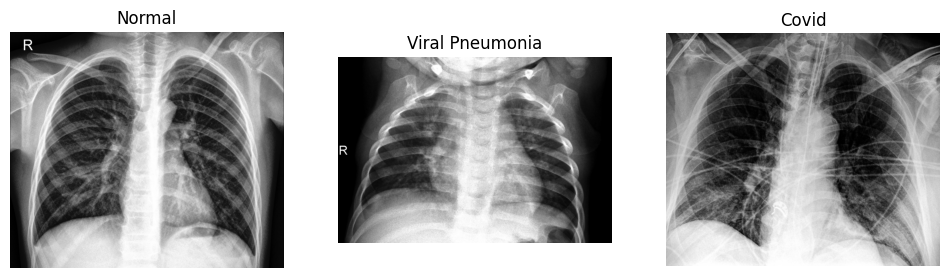

In [7]:
plot_image(image_classes)

In [10]:
#Define ImageDataGenerator
data_generator = ImageDataGenerator(rescale = 1/255)

In [11]:
#apply ImageDataGenerator on train data
train_data = data_generator.flow_from_directory(train_path,
                                               target_size = (224,224),
                                               batch_size = 16) #default 32

Found 251 images belonging to 3 classes.


In [13]:
#apply ImageDataGenerator on test data
test_data = data_generator.flow_from_directory(test_path,
                                              target_size = (224,224),
                                              batch_size = 16)

Found 66 images belonging to 3 classes.


In [56]:
 # MLP Model
mlp_model = Sequential()
# Input layer ---> hidden layer ---> hidden layer ---> hidden layer ---> output layer
#Input layer ---> Flatten
mlp_model.add(Flatten(input_shape = (224,224,3)))

#Hidden layers ---> Dense
mlp_model.add(Dense(128, activation = 'relu'))
mlp_model.add(Dense(64, activation = 'relu'))
mlp_model.add(Dense(128, activation = 'relu'))

#Output Layer ---> Dense
mlp_model.add(Dense(3, activation ='softmax'))


In [57]:
mlp_model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,284,675 (73.57 MB)

 Trainable params: 19,284,675 (73.57 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Model compile
mlp_model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [59]:
# Fit the model
mlp_history = mlp_model.fit(train_data, 
              epochs = 5,
              validation_data = test_data)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - accuracy: 0.4156 - loss: 12.1575 - val_accuracy: 0.5606 - val_loss: 3.6264
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.7446 - loss: 2.8090 - val_accuracy: 0.6667 - val_loss: 2.5497
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/step - accuracy: 0.8500 - loss: 1.4850 - val_accuracy: 0.7727 - val_loss: 1.2073
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 399ms/step - accuracy: 0.9496 - loss: 0.3824 - val_accuracy: 0.7879 - val_loss: 2.1579
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - accuracy: 0.7347 - loss: 1.6045 - val_accuracy: 0.8333 - val_loss: 2.0462


In [62]:
mlp_model.evaluate(test_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.7899 - loss: 2.4217


[2.0461971759796143, 0.8333333134651184]

<function matplotlib.pyplot.show(close=None, block=None)>

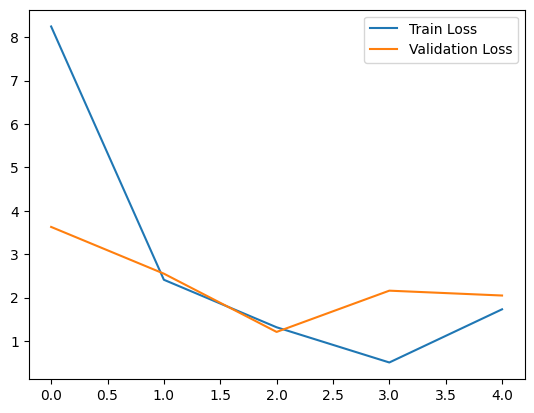

In [60]:
plt.plot(mlp_history.history['loss'], label = 'Train Loss')
plt.plot(mlp_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

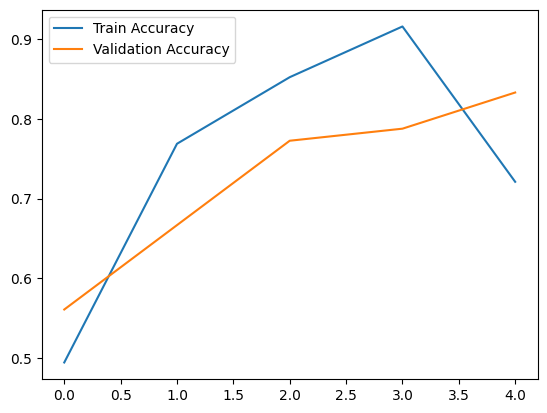

In [61]:
plt.plot(mlp_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show

In [47]:
#CNN Model 
cnn_model = Sequential()
#Conv Layers (Hidden layers) + Classification layers

#Input layer
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', 
                     input_shape = [224, 224, 3]))
#Pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#Hidden layer
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'))
#Pooling layer
cnn_model.add(MaxPooling2D())

#Hidden layer
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'))
#Pooling layer
cnn_model.add(MaxPooling2D())

#Flatten layer
cnn_model.add(Flatten())

#Fully connected layer
cnn_model.add(Dense(128, activation = 'relu'))
#Fully connected layer
cnn_model.add(Dense(128, activation = 'relu'))

#Output layer
cnn_model.add(Dense(3, activation = 'softmax'))

In [48]:
# Model Compile
cnn_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [49]:
cnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,495,875 (24.78 MB)

 Trainable params: 6,495,875 (24.78 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Fit the CNN Model
cnn_history = cnn_model.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 920ms/step - accuracy: 0.5858 - loss: 1.1359 - val_accuracy: 0.7576 - val_loss: 0.5360
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 864ms/step - accuracy: 0.9038 - loss: 0.2319 - val_accuracy: 0.7727 - val_loss: 0.4775
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 879ms/step - accuracy: 0.9322 - loss: 0.1689 - val_accuracy: 0.8788 - val_loss: 0.3758
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 849ms/step - accuracy: 0.9735 - loss: 0.0878 - val_accuracy: 0.8939 - val_loss: 0.3867
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 893ms/step - accuracy: 0.9686 - loss: 0.1082 - val_accuracy: 0.8788 - val_loss: 0.3555


In [53]:
cnn_model.evaluate(test_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.8780 - loss: 0.3278


[0.3555019497871399, 0.8787878751754761]

<function matplotlib.pyplot.show(close=None, block=None)>

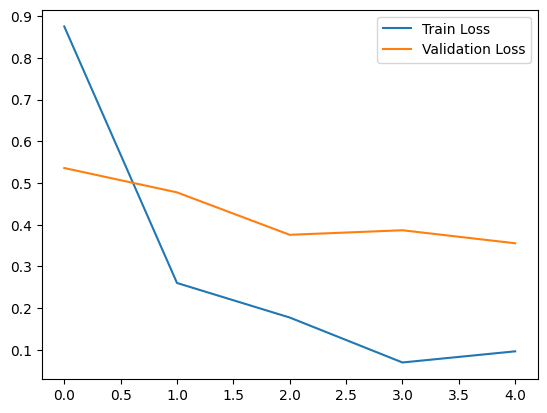

In [52]:
plt.plot(cnn_history.history['loss'], label = 'Train Loss')
plt.plot(cnn_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

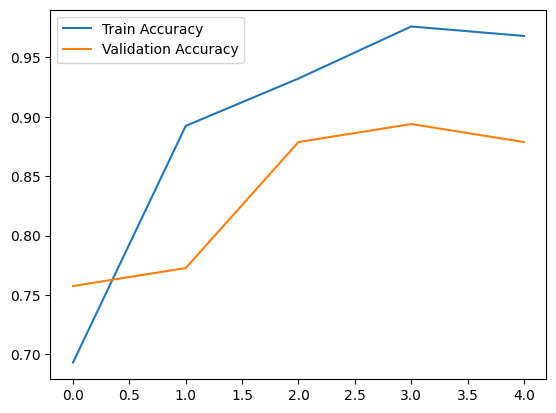

In [51]:
plt.plot(cnn_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show

In [54]:
cnn_model.save('Covid19_model.h5')

In [63]:
class_map = dict([value,key] for key, value in train_data.class_indices.items())
print(class_map)

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [64]:
def prediction(test_image, actual_label):
    #load & Preprocessing image
    testing_image = image.load_img(test_image, target_size=(224,224))
    testing_image_array = image.img_to_array(testing_image) / 255
    testing_image_input = testing_image_array.reshape(1, testing_image_array.shape[0],
                                                     testing_image_array.shape[1],
                                                     testing_image_array.shape[2])
    predicted_class = np.argmax(cnn_model.predict(testing_image_input))
    predicted_label = class_map[predicted_class]
    plt.figure(figsize = (4,4))
    plt.imshow(testing_image_array)
    plt.title('Actual Label: {}, Predicted Label: {}'.format(actual_label, predicted_label))
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


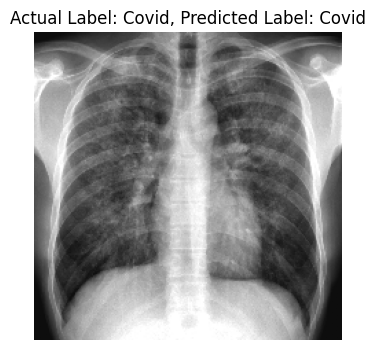

In [66]:
test_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid/019.png'
prediction(test_image , actual_label = 'Covid')